In [3]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cd /Users/davidchen/Documents/GitHub/Subtype

/Users/davidchen/Documents/GitHub/Subtype


In [5]:
filtered_list = ['Bone-Benign',
'Bone-Epith',
'Bone-Osteosarc',
'Breast-AdenoCA',
'Breast-DCIS',
'Breast-LobularCA',
'CNS-GBM',
'CNS-Medullo',
'CNS-Oligo',
'CNS-PiloAstro',
'Myeloid-AML',
'Myeloid-MDS',
'Myeloid-MPN']

In [6]:
def abs_path(target_name, directory_level): 
    """
Returns absolute file path of target name in working directory.

Arguments:
    target_name (str): Name of file or folder to find.
    directory_level (str): Level of os search, either File or Folder.   
    """
    #Find the relative working directory of the script
    wk_dir = os.path.dirname(os.path.realpath('__file__'))
    
    if directory_level == "File":
        #Absolute file path
        for root, dirs, files in os.walk(wk_dir):
            for name in files:
                if target_name == name:
                    target_path = (os.path.abspath(os.path.join(root, name))) 
             
    #Absolute file path
    if directory_level == "Directory":
        for root, dirs, files in os.walk(wk_dir):
            for name in dirs:
                if target_name == name:
                    target_path = (os.path.abspath(os.path.join(root, name))) 
    
    return target_path

In [7]:
breast_df = pd.read_excel(abs_path("Subtype_Accuracy.xlsx", "File"), sheet_name="Breast", index_col=0).iloc[:7, :].T
breast_df

,Linear Discriminant,Linear SVM,Quadratic SVM,Fine KNN,Subspace Discriminant,Subspace KNN,Average
k=2,69.8,94,94,93.3,92.5,93.8,89.6
k=4,67.3,92.8,92.3,90.5,86.8,92,87
k=6,88.5,92.5,91.8,87,91.8,89.3,90.1
k=8,86.5,81.5,84,80.8,83.8,83.5,83.3
k=10,80,77.8,80.8,79.5,79.3,79.3,79.5


In [8]:
def accuracy_plot(df, cancer, legend):
    fig, ax = plt.subplots(figsize=(20,10)) 

    ax.plot(range(5), df['Linear Discriminant'], marker='o', markerfacecolor='royalblue', markersize=12, color='skyblue', label="Linear Discriminant", linewidth=4)
    ax.plot(range(5), df['Linear SVM'], marker='o', markerfacecolor='red', markersize=12, color='lightcoral', label="Linear SVM", linewidth=4)
    ax.plot(range(5), df['Quadratic SVM'], marker='o', markerfacecolor='orange', markersize=12, color='navajowhite', label='Quadratic SVM', linewidth=4)
    ax.plot(range(5), df['Fine KNN'], marker='o', markerfacecolor='olivedrab', markersize=12, color='yellowgreen', label='Fine KNN', linewidth=4)
    ax.plot(range(5), df['Subspace Discriminant'], marker='o', markerfacecolor='turquoise', markersize=12, color='paleturquoise', label='Subspace Discriminant', linewidth=4)
    ax.plot(range(5), df['Subspace KNN'], marker='o', markerfacecolor='mediumpurple', markersize=12, color='lavender', label='Subspace KNN', linewidth=4)
    ax.plot(range(5), df['Average'], marker='o', markerfacecolor='palevioletred', markersize=12, color='lavenderblush', label="Average", linewidth=4)
    ax.legend(loc=legend, title="ML_DSP Classifier", fancybox=True)
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(40, 100)
    ax.set_title("ML-DSP Classifier 10-fold Cross Validated Classification Performance on " + str(cancer) + " Simulated Sequences", weight="bold")
    ax.set_ylabel("Accuracy (%) of ML-DSP Classifier for Cancer Type Classification", weight = 'bold', labelpad=10 )
    ax.set_xticks([])
    ax.set_xlabel("K Value for Chaos Game Representation of Simulated Sequences", labelpad=110, weight = 'bold')
   
    colLabels = ['K=2', 'K=4', 'K=6', 'K=8', 'K=10']
    rowLabels = ['Linear Discriminant', 'Linear SVM', 'Quadratic SVM', 'Fine KNN', 'Subspace Discriminant', 'Subspace KNN', 'Average']
    plt.subplots_adjust(left = 0.2, bottom = 0.2) 
    tables = ax.table(cellText=np.array(df.T),
                  rowColours = ['royalblue','red','orange','olivedrab','turquoise','mediumpurple','palevioletred'],
                  colWidths = [0.2, 0.2, 0.2, 0.2, 0.2],
                  rowLabels=rowLabels, 
                  colLabels=colLabels,
                  loc='bottom')
    
    def set_align_for_column(table, col, align="left"):
        cells = [key for key in table._cells if key[1] == col]
        for cell in cells:
            table._cells[cell]._loc = align
            
    set_align_for_column(tables, col=0, align="center")
    set_align_for_column(tables, col=1, align="center")
    set_align_for_column(tables, col=2, align="center")
    set_align_for_column(tables, col=3, align="center")
    set_align_for_column(tables, col=4, align="center")



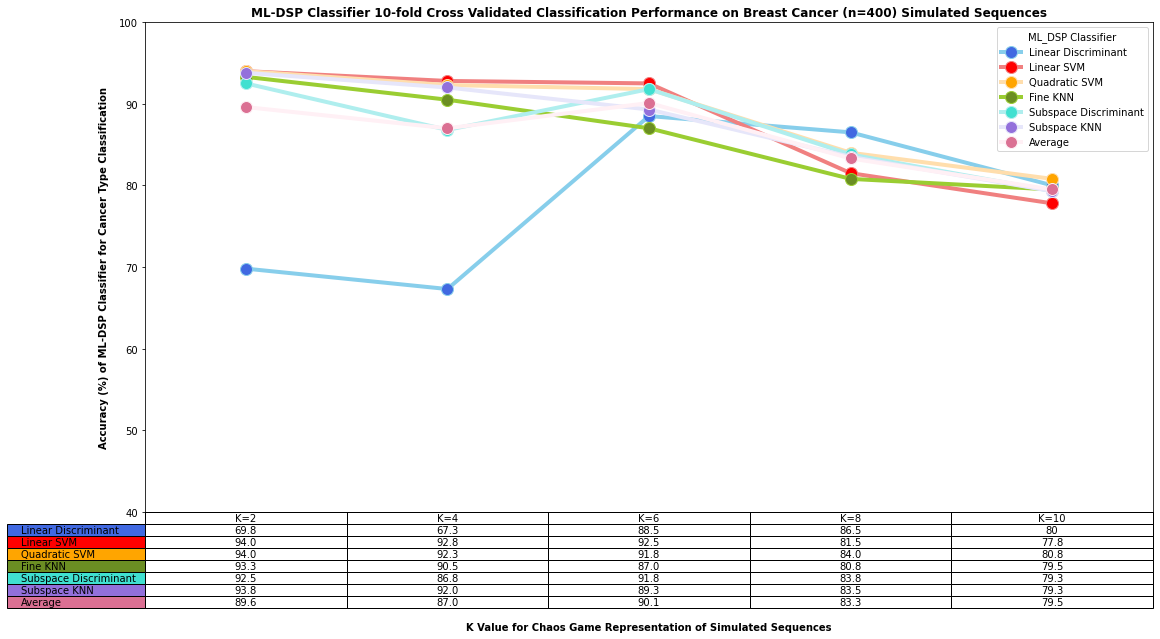

In [10]:
accuracy_plot(breast_df, "Breast Cancer (n=400)", "upper right")

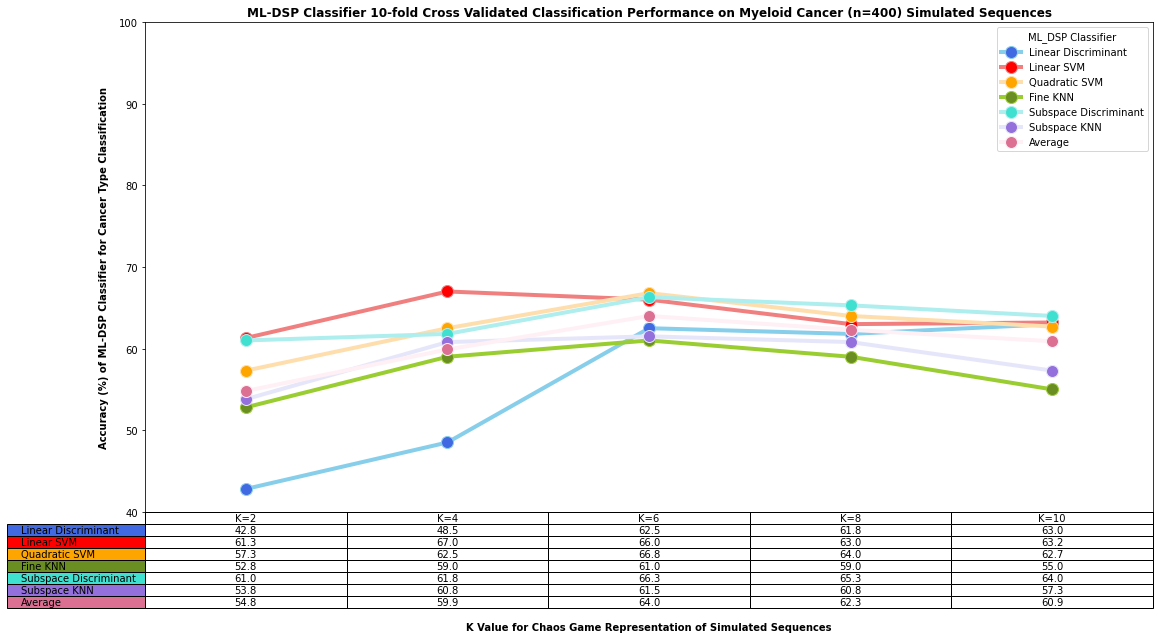

In [11]:
myeloid_df = pd.read_excel(abs_path("Subtype_Accuracy.xlsx", "File"), sheet_name="Myeloid", index_col=0).iloc[:7, :].T
accuracy_plot(myeloid_df, "Myeloid Cancer (n=400)", "upper right")

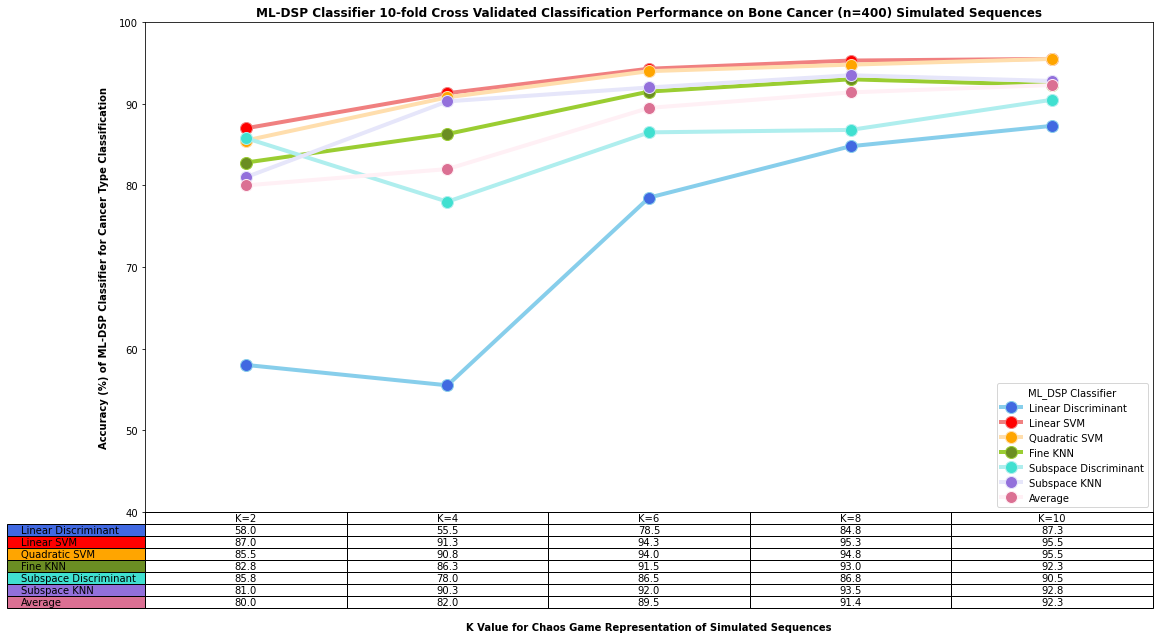

In [12]:
bone_df = pd.read_excel(abs_path("Subtype_Accuracy.xlsx", "File"), sheet_name="Bone", index_col=0).iloc[:7, :].T
accuracy_plot(bone_df, "Bone Cancer (n=400)", "lower right")

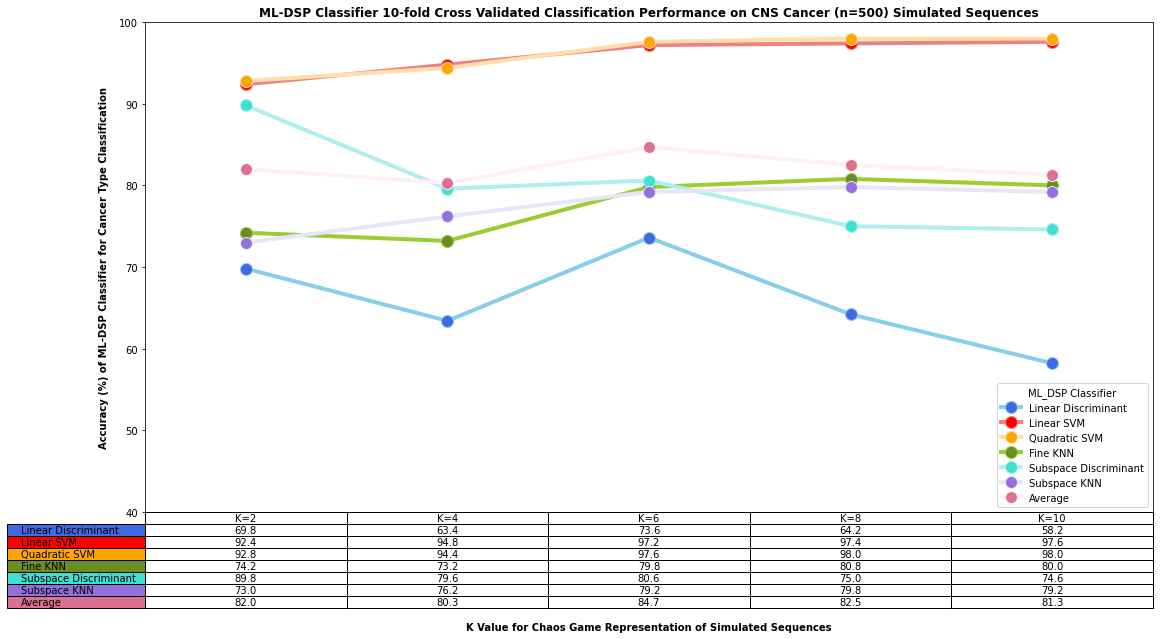

In [13]:
cns_df = pd.read_excel(abs_path("Subtype_Accuracy.xlsx", "File"), sheet_name="CNS", index_col=0).iloc[:7, :].T
accuracy_plot(cns_df, "CNS Cancer (n=500)", "lower right")

In [14]:
breast_df

,Linear Discriminant,Linear SVM,Quadratic SVM,Fine KNN,Subspace Discriminant,Subspace KNN,Average
k=2,69.8,94,94,93.3,92.5,93.8,89.6
k=4,67.3,92.8,92.3,90.5,86.8,92,87
k=6,88.5,92.5,91.8,87,91.8,89.3,90.1
k=8,86.5,81.5,84,80.8,83.8,83.5,83.3
k=10,80,77.8,80.8,79.5,79.3,79.3,79.5


In [15]:
bone_df

,Linear Discriminant,Linear SVM,Quadratic SVM,Fine KNN,Subspace Discriminant,Subspace KNN,Average
k=2,58.0,87.0,85.5,82.8,85.8,81.0,80.0
k=4,55.5,91.3,90.8,86.3,78.0,90.3,82.0
k=6,78.5,94.3,94.0,91.5,86.5,92.0,89.5
k=8,84.8,95.3,94.8,93.0,86.8,93.5,91.4
k=10,87.3,95.5,95.5,92.3,90.5,92.8,92.3


In [16]:
cns_df

,Linear Discriminant,Linear SVM,Quadratic SVM,Fine KNN,Subspace Discriminant,Subspace KNN,Average
k=2,69.8,92.4,92.8,74.2,89.8,73.0,82.0
k=4,63.4,94.8,94.4,73.2,79.6,76.2,80.3
k=6,73.6,97.2,97.6,79.8,80.6,79.2,84.7
k=8,64.2,97.4,98.0,80.8,75.0,79.8,82.5
k=10,58.2,97.6,98.0,80.0,74.6,79.2,81.3


In [17]:
myeloid_df

,Linear Discriminant,Linear SVM,Quadratic SVM,Fine KNN,Subspace Discriminant,Subspace KNN,Average
k=2,42.8,61.3,57.3,52.8,61.0,53.8,54.8
k=4,48.5,67.0,62.5,59.0,61.8,60.8,59.9
k=6,62.5,66.0,66.8,61.0,66.3,61.5,64.0
k=8,61.8,63.0,64.0,59.0,65.3,60.8,62.3
k=10,63.0,63.2,62.7,55.0,64.0,57.3,60.9


In [18]:
best_acc = pd.DataFrame(index = breast_df.index, columns = ["Breast", "Bone", "CNS", "Myeloid"])
best_acc["Breast"] = breast_df['Quadratic SVM']
best_acc["Bone"] = bone_df['Quadratic SVM']
best_acc["CNS"] = cns_df['Quadratic SVM']
best_acc["Myeloid"] = myeloid_df['Quadratic SVM']

In [19]:
best_acc

,Breast,Bone,CNS,Myeloid
k=2,94,85.5,92.8,57.3
k=4,92.3,90.8,94.4,62.5
k=6,91.8,94.0,97.6,66.8
k=8,84,94.8,98.0,64.0
k=10,80.8,95.5,98.0,62.7


In [25]:
def accuracy_plot_summary(df, cancer, legend):
    fig, ax = plt.subplots(figsize=(20,10)) 

    ax.plot(range(5), df['Breast'], marker='o', markerfacecolor='royalblue', markersize=12, color='skyblue', label="Breast Cancer", linewidth=4)
    ax.plot(range(5), df['Bone'], marker='o', markerfacecolor='red', markersize=12, color='lightcoral', label="Bone Cancer", linewidth=4)
    ax.plot(range(5), df['CNS'], marker='o', markerfacecolor='orange', markersize=12, color='navajowhite', label='CNS Cancer', linewidth=4)
    ax.plot(range(5), df['Myeloid'], marker='o', markerfacecolor='olivedrab', markersize=12, color='yellowgreen', label='Myeloid Cancer', linewidth=4)
   
    ax.legend(loc=legend, title="Cancer Type", fancybox=True, fontsize=13, title_fontsize=13)
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(50, 100)
    ax.set_title("ML-DSP Classifier 10-fold Cross Validated Classification \n Performance on " + str(cancer) + " Simulated Sequences", size = 30, weight="bold", pad=20)
    ax.set_ylabel("Accuracy (%) of Best-Performing ML-DSP \n Classifier for Cancer Type Classification", weight = 'bold', size = 20, labelpad=20 )
    ax.set_xticks([])
    ax.set_xlabel("K Value for Chaos Game Representation of Simulated Sequences", labelpad=150, weight = 'bold', size = 20)
   
    colLabels = ['K=2', 'K=4', 'K=6', 'K=8', 'K=10']
    rowLabels = ['Breast Cancer', 'Bone Cancer', 'CNS Cancer', 'Myeloid Cancer']
    plt.subplots_adjust(left = 0.2, bottom = 0.2) 
    tables = ax.table(cellText=np.array(df.T),
                  rowColours = ['royalblue','red','orange','olivedrab'],
                  colWidths = [0.2, 0.2, 0.2, 0.2, 0.2],
                  rowLabels=rowLabels, 
                  colLabels=colLabels,
                  loc='bottom')

    def set_align_for_column(table, col, align="left"):
        cells = [key for key in table._cells if key[1] == col]
        for cell in cells:
            table._cells[cell]._loc = align

    set_align_for_column(tables, col=0, align="center")
    set_align_for_column(tables, col=1, align="center")
    set_align_for_column(tables, col=2, align="center")
    set_align_for_column(tables, col=3, align="center")  
    set_align_for_column(tables, col=4, align="center")
    tables.set_fontsize(15)
    tables.scale(1, 2)

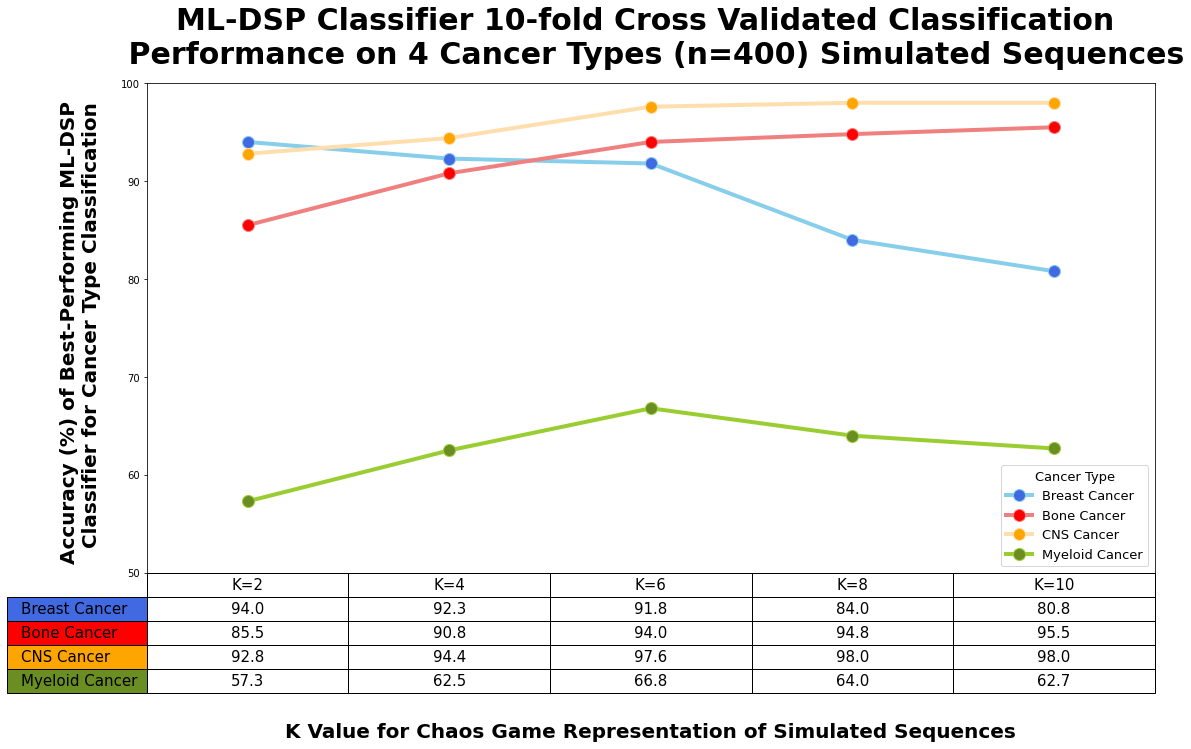

In [26]:
accuracy_plot_summary(df=best_acc, cancer = "4 Cancer Types (n=400)", legend="lower right")